In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# load data 
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Log Reg Model
logreg = make_pipeline(LogisticRegression(max_iter=10000))
logreg.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=10000))])

In [11]:
# predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Classification Report: {class_rep}")

Model Accuracy: 0.96
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



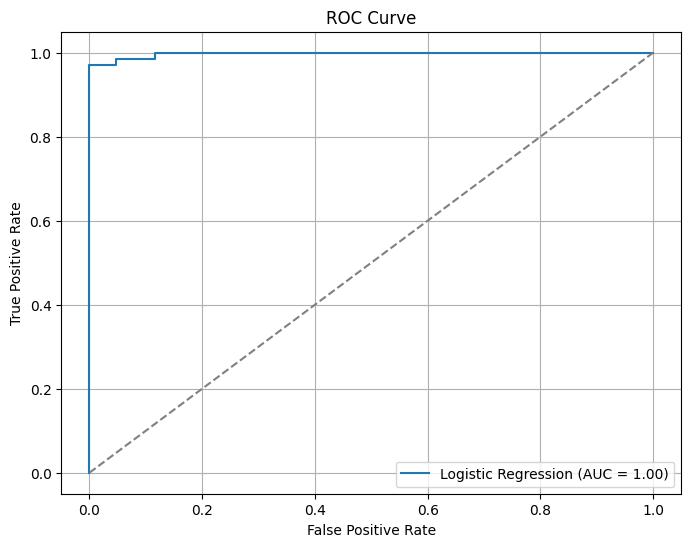

In [13]:
# Predict probabilities (for ROC)
y_scores = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC (area under the curve)
auc_score = roc_auc_score(y_test, y_scores)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
